In [49]:
import pandas as pd
import numpy as np
np.random.seed(42)
num_students = 100
lectures_attended = np.random.randint(0, 31, size = num_students)
marks_obtained = np.clip((lectures_attended * 0.6 + np.random.normal(0, 2, size = num_students)), 0, 20)
df = pd.DataFrame({
    'Lectures_Attended': lectures_attended,
    'Marks_Obtained': marks_obtained.round(2)
})
df.to_csv('lecture_marks_dataset.csv', index=False)
print("Dataset saved as 'lecture_marks_dataset.csv'")

Dataset saved as 'lecture_marks_dataset.csv'


This simulates marks for each student, assuming marks are out of 20.

lectures_attended * 0.6 means each lecture attended contributes 0.6 marks on average, showing a positive correlation between attendance and marks.

np.random.normal(0, 2, size=num_students) adds some random noise (normally distributed with mean 0 and std deviation 2) to simulate variability in marks.

np.clip(..., 0, 20) ensures all marks are capped between 0 and 20 (no negative marks, no marks above 20).


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, linregress

In [54]:
df=pd.read_csv("lecture_marks_dataset.csv")

In [56]:
df.head()

,Lectures_Attended,Marks_Obtained
0,6,0.00
1,19,9.31
2,28,17.15
3,14,9.05
4,10,7.49


In [58]:
print(df.describe())

       Lectures_Attended  Marks_Obtained
count         100.000000      100.000000
mean           16.110000        9.713700
std             9.119737        5.918186
min             0.000000        0.000000
25%             7.750000        4.915000
50%            17.000000       10.330000
75%            24.250000       14.647500
max            30.000000       20.000000


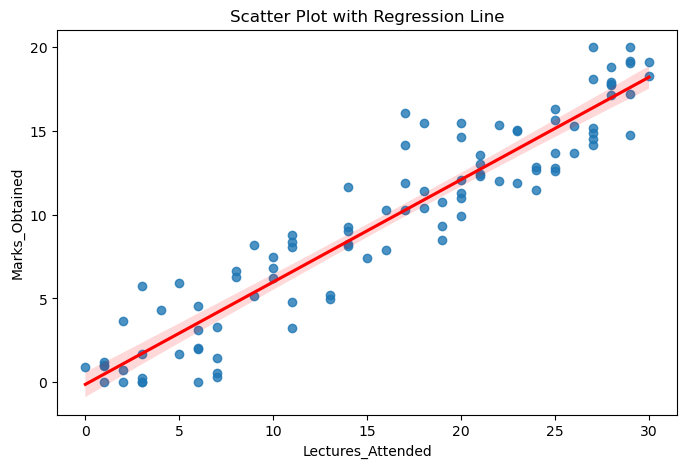

In [60]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Lectures_Attended', y='Marks_Obtained', data=df, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line')
plt.savefig("scatter_regression.png")
plt.show()

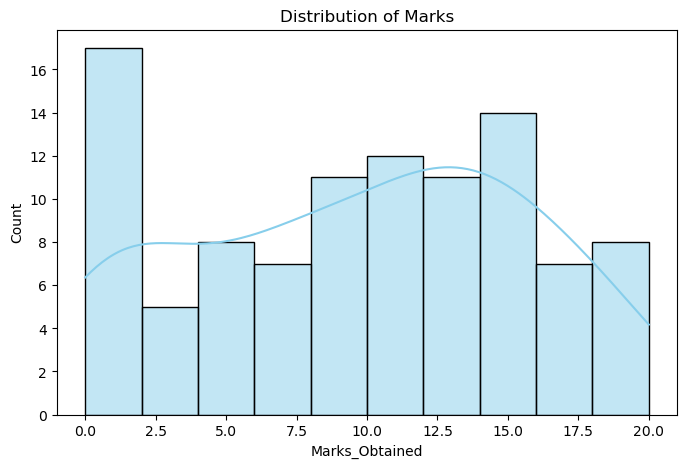

In [62]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Marks_Obtained'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Marks')
plt.savefig("marks_distribution.png")
plt.show()

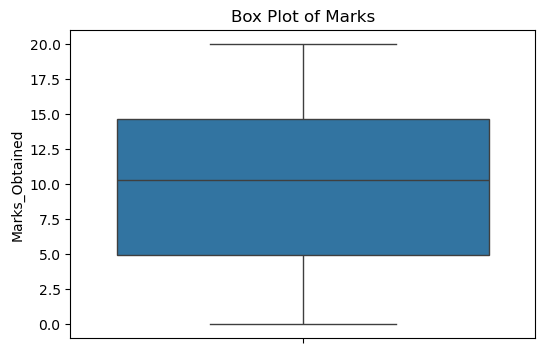

In [64]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Marks_Obtained', data=df)
plt.title('Box Plot of Marks')
plt.savefig("boxplot_marks.png")
plt.show()

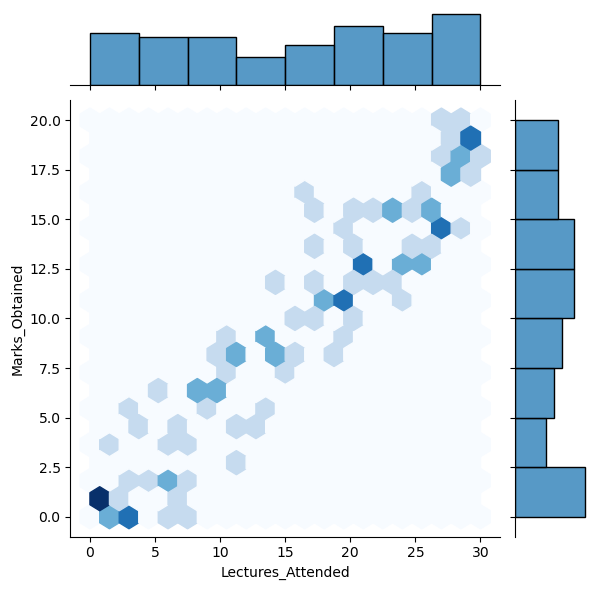

In [66]:
sns.jointplot(x='Lectures_Attended', y='Marks_Obtained', data=df, kind='hex', gridsize=20, cmap='Blues')
plt.savefig("joint_distribution.png")
plt.show()

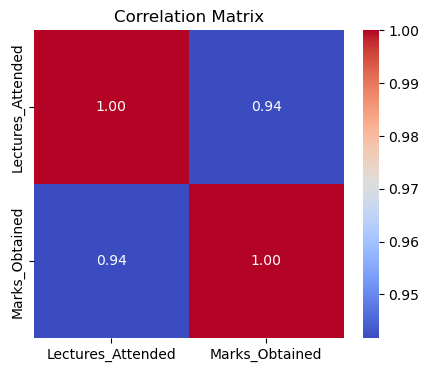

In [68]:
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig("correlation_heatmap.png")
plt.show()

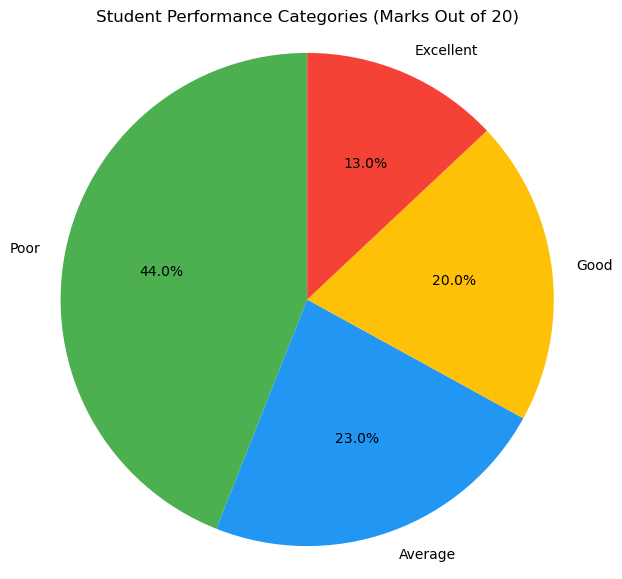

In [70]:
def categorize(marks):
    if marks >= 17:
        return 'Excellent'
    elif marks >= 13:
        return 'Good'
    elif marks >= 9:
        return 'Average'
    else:
        return 'Poor'
df['Category'] = df['Marks_Obtained'].apply(categorize)
category_counts = df['Category'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#4CAF50', '#2196F3', '#FFC107', '#F44336'])
plt.title('Student Performance Categories (Marks Out of 20)')
plt.axis('equal') 
plt.show()

In [72]:
df

,Lectures_Attended,Marks_Obtained,Category
0,6,0.00,Poor
1,19,9.31,Average
2,28,17.15,Excellent
3,14,9.05,Average
4,10,7.49,Poor
...,...,...,...
95,21,13.03,Good
96,28,17.82,Excellent
97,30,19.09,Excellent
98,17,10.26,Average


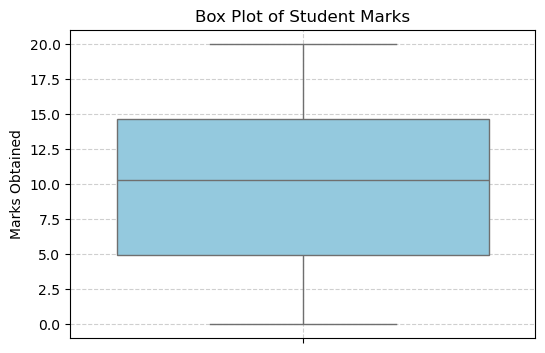

In [74]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Marks_Obtained', data=df, color='skyblue')
plt.title('Box Plot of Student Marks')
plt.ylabel('Marks Obtained')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()